# R PLOTS

Use la base de tados pesos.dta almacenada en la carpea \data\Pesos.
En un mismo gráfico presente la distribución absoluta, frecuencia y densidades de los pesos de los recién nacidos si la madre 
es fumadora o no. El gráfico debe presentar titulo, títulos en ejes y leyenda.


1-. Corremos la base

In [52]:
library(ggplot2)  # plots packages
library(tidyr) # read and filter dataset
install.packages("lmtest")
install.packages("sandwich")
library(sandwich)
library(lmtest)
library(xtable)#install.packages('xtable')
library(haven)  # read STATA.dta 
library(dplyr)  # filter dataset
library(readxl)


  There is a binary version available but the source version is later:
       binary source needs_compilation
lmtest 0.9-38 0.9-40              TRUE

  Binaries will be installed


Warning message:
"package 'lmtest' is in use and will not be installed"


  There is a binary version available but the source version is later:
         binary source needs_compilation
sandwich  3.0-0  3.0-1             FALSE



installing the source package 'sandwich'



In [53]:
base <- read_dta("C:/Users/USER/Documents/GitHub/1ECO35_R_PYTHON/data/Pesos/peso.dta")
base

faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
13.5,16.5,122.3,109,12,12,1,1,1,0,4.691348,6.8125,0.0,2.6026900
7.5,16.5,122.3,133,6,12,2,1,0,0,4.890349,8.3125,0.0,2.0149031
0.5,16.5,122.3,129,NA,12,2,0,0,0,4.859812,8.0625,0.0,-0.6931472
15.5,16.5,122.3,126,12,12,2,1,0,0,4.836282,7.8750,0.0,2.7408400
27.5,16.5,122.3,134,14,12,2,1,1,0,4.897840,8.3750,0.0,3.3141861
7.5,16.5,122.3,118,12,14,6,1,0,0,4.770685,7.3750,0.0,2.0149031
65.0,16.5,122.3,140,16,14,2,0,1,0,4.941642,8.7500,0.0,4.1743870
27.5,16.5,122.3,86,12,14,2,0,0,0,4.454347,5.3750,0.0,3.3141861
27.5,16.5,122.3,121,12,17,2,0,1,0,4.795791,7.5625,0.0,3.3141861
37.5,16.5,122.3,129,16,18,2,0,1,0,4.859812,8.0625,0.0,3.6243410


In [54]:
#Variables de la base de datos:

#lbwght : peso del bebe en logaritmo (peso medido en libras)
#cigprice: precio de la cajetilla de cigarros
#motheduc: educación de la madre
#cigs: cajetillas consumidas de cigarro
#white: origen racial de la madre
#lfaminc: logaritmo del salario real de la madre
attach(base)

The following objects are masked from base (pos = 4):

    bwght, bwghtlbs, cigprice, cigs, cigtax, faminc, fatheduc, lbwght,
    lfaminc, male, motheduc, packs, parity, white

The following objects are masked from base (pos = 8):

    bwght, bwghtlbs, cigprice, cigs, cigtax, faminc, fatheduc, lbwght,
    lfaminc, male, motheduc, packs, parity, white



In [55]:
head(base)

faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
13.5,16.5,122.3,109,12,12,1,1,1,0,4.691348,6.8125,0,2.6026900
7.5,16.5,122.3,133,6,12,2,1,0,0,4.890349,8.3125,0,2.0149031
0.5,16.5,122.3,129,NA,12,2,0,0,0,4.859812,8.0625,0,-0.6931472
15.5,16.5,122.3,126,12,12,2,1,0,0,4.836282,7.8750,0,2.7408400
27.5,16.5,122.3,134,14,12,2,1,1,0,4.897840,8.3750,0,3.3141861
7.5,16.5,122.3,118,12,14,6,1,0,0,4.770685,7.3750,0,2.0149031


2-.Crear una dummy si la madre es fumadora de cigarros

In [56]:
base <- mutate(base,mcigs=ifelse(cigs>0,1,0)) #Tiene el valor de 1 si fuma, 0 lo contrario
base <- mutate(base,mcigs=case_when(mcigs==1~"Fumadora",
                                   mcigs==0~"No fumadora"))
base


faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc,mcigs
13.5,16.5,122.3,109,12,12,1,1,1,0,4.691348,6.8125,0.0,2.6026900,No fumadora
7.5,16.5,122.3,133,6,12,2,1,0,0,4.890349,8.3125,0.0,2.0149031,No fumadora
0.5,16.5,122.3,129,NA,12,2,0,0,0,4.859812,8.0625,0.0,-0.6931472,No fumadora
15.5,16.5,122.3,126,12,12,2,1,0,0,4.836282,7.8750,0.0,2.7408400,No fumadora
27.5,16.5,122.3,134,14,12,2,1,1,0,4.897840,8.3750,0.0,3.3141861,No fumadora
7.5,16.5,122.3,118,12,14,6,1,0,0,4.770685,7.3750,0.0,2.0149031,No fumadora
65.0,16.5,122.3,140,16,14,2,0,1,0,4.941642,8.7500,0.0,4.1743870,No fumadora
27.5,16.5,122.3,86,12,14,2,0,0,0,4.454347,5.3750,0.0,3.3141861,No fumadora
27.5,16.5,122.3,121,12,17,2,0,1,0,4.795791,7.5625,0.0,3.3141861,No fumadora
37.5,16.5,122.3,129,16,18,2,0,1,0,4.859812,8.0625,0.0,3.6243410,No fumadora


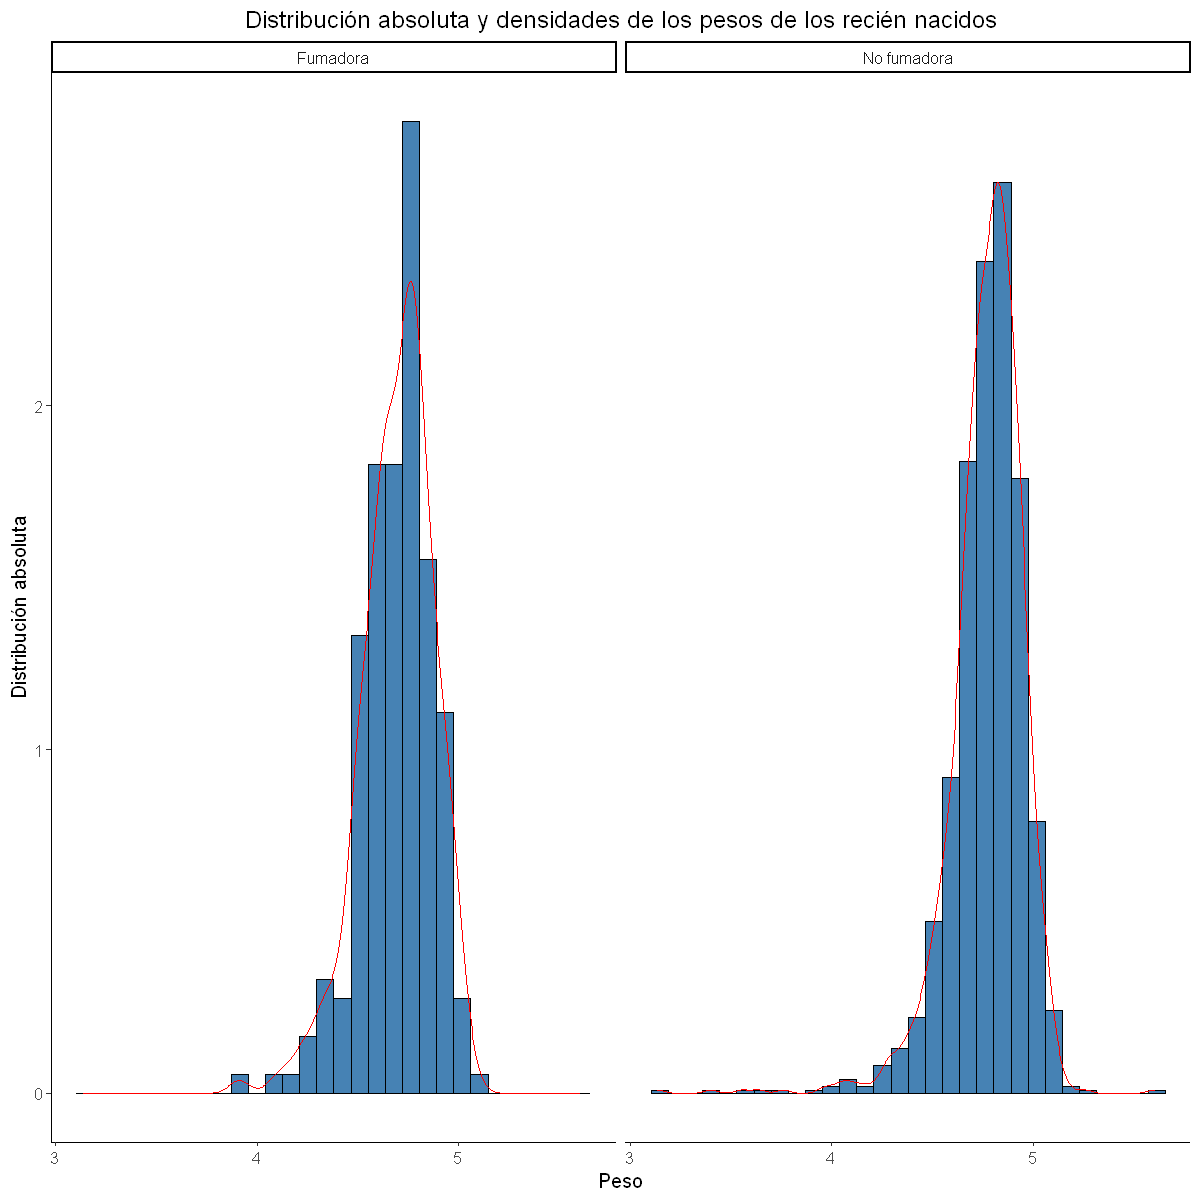

In [57]:
theme_set(theme_classic() + theme(legend.position = "right"))

 ggplot(data=base) + aes(x=lbwght,y=..density..) +geom_histogram( bins = 30, color = "black", fill = "steelblue")+ geom_density(color = "red")+
    labs(x = "Peso", y = "Distribución absoluta", title = "Distribución absoluta y densidades de los pesos de los recién nacidos") + 
     theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5))+facet_grid(~mcigs)

3-.Crear un coefplot de las siguientes tres regresiones:

a) lbwght ~ Dummy

b) lbwght ~ Dummy + mothedu

c) lbwght~ Dummy + mothedu + lfaminc + white + Dummy:(mothedu + lfaminc + white)

Dummy : (mothedu + lfaminc + white) crea variables interactivas.

Dummy : (mothedu + lfaminc + white) = Dummy * mothedu + Dummy * lfaminc + Dummy * white

In [58]:
#a
b1<-lm( lbwght ~ mcigs , base)
summary(b1)


Call:
lm(formula = lbwght ~ mcigs, data = base)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.63628 -0.08965  0.02401  0.11857  0.83034 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.69487    0.01296 362.239  < 2e-16 ***
mcigsNo fumadora  0.07691    0.01408   5.462 5.56e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1887 on 1386 degrees of freedom
Multiple R-squared:  0.02107,	Adjusted R-squared:  0.02037 
F-statistic: 29.84 on 1 and 1386 DF,  p-value: 5.563e-08


In [59]:
HCV.coefs1 <- vcovHC (b1, type = 'HC')
diag(HCV.coefs1)

(Intercept) mcigsNo fumadora 
    0.0001582818     0.0001888275

In [60]:
b1 <- lm(lbwght ~ mcigs , base)
b1.est <- summary(b1)$coef[2,1]

HCV.coefs1 <- vcovHC(b1, type = 'HC');
b1.se <- sqrt(diag(HCV.coefs1))[2] # Estimated std errors

In [61]:
#b
b2<-lm( lbwght ~ mcigs+motheduc , base)
b2.est <- summary(b2)$coef[2,1]

HCV.coefs2 <- vcovHC(b2, type = 'HC');
b2.se <- sqrt(diag(HCV.coefs2))[2] # Estimated std errors

In [62]:
#c
b3<-lm( lbwght ~ mcigs+motheduc+ lfaminc + white + mcigs * motheduc + mcigs * lfaminc + mcigs* white, base)
b3.est <- summary(b3)$coef[2,1]

HCV.coefs3 <- vcovHC(b3, type = 'HC');
b3.se <- sqrt(diag(HCV.coefs3))[2] # Estimated std errors

In [63]:
table<- matrix(0, 3, 4)
table[1,1]<- b1.est  
table[1,2]<- b1.se   
table[2,1]<- b2.est
table[2,2]<- b2.se  
table[3,1]<- b3.est
table[3,2]<- b3.se
table[1,3]<- coefci(b1, df = Inf, vcov. = vcovHC, type = "HC")[2,1] 
table[1,4]<- coefci(b1, df = Inf, vcov. = vcovHC, type = "HC")[2,2] 
table[2,3]<- coefci(b2, df = Inf, vcov. = vcovHC, type = "HC")[2,1] 
table[2,4]<- coefci(b2, df = Inf, vcov. = vcovHC, type = "HC")[2,2] 
table[3,3]<- coefci(b3, df = Inf, vcov. = vcovHC, type = "HC")[2,1] 
table[3,4]<- coefci(b3, df = Inf, vcov. = vcovHC, type = "HC")[2,2] 

colnames(table)<- c("Estimate","se","lower_bound","upper_bound")
rownames(table)<- c("OLS1", "OLS2", "OLS3")
tab1<- xtable(table)
tab1

,Estimate,se,lower_bound,upper_bound
OLS1,0.07691258,0.01374145,0.04997983,0.1038453
OLS2,0.07302848,0.01414047,0.04531367,0.1007433
OLS3,-0.01259515,0.08887885,-0.18679450,0.1616042


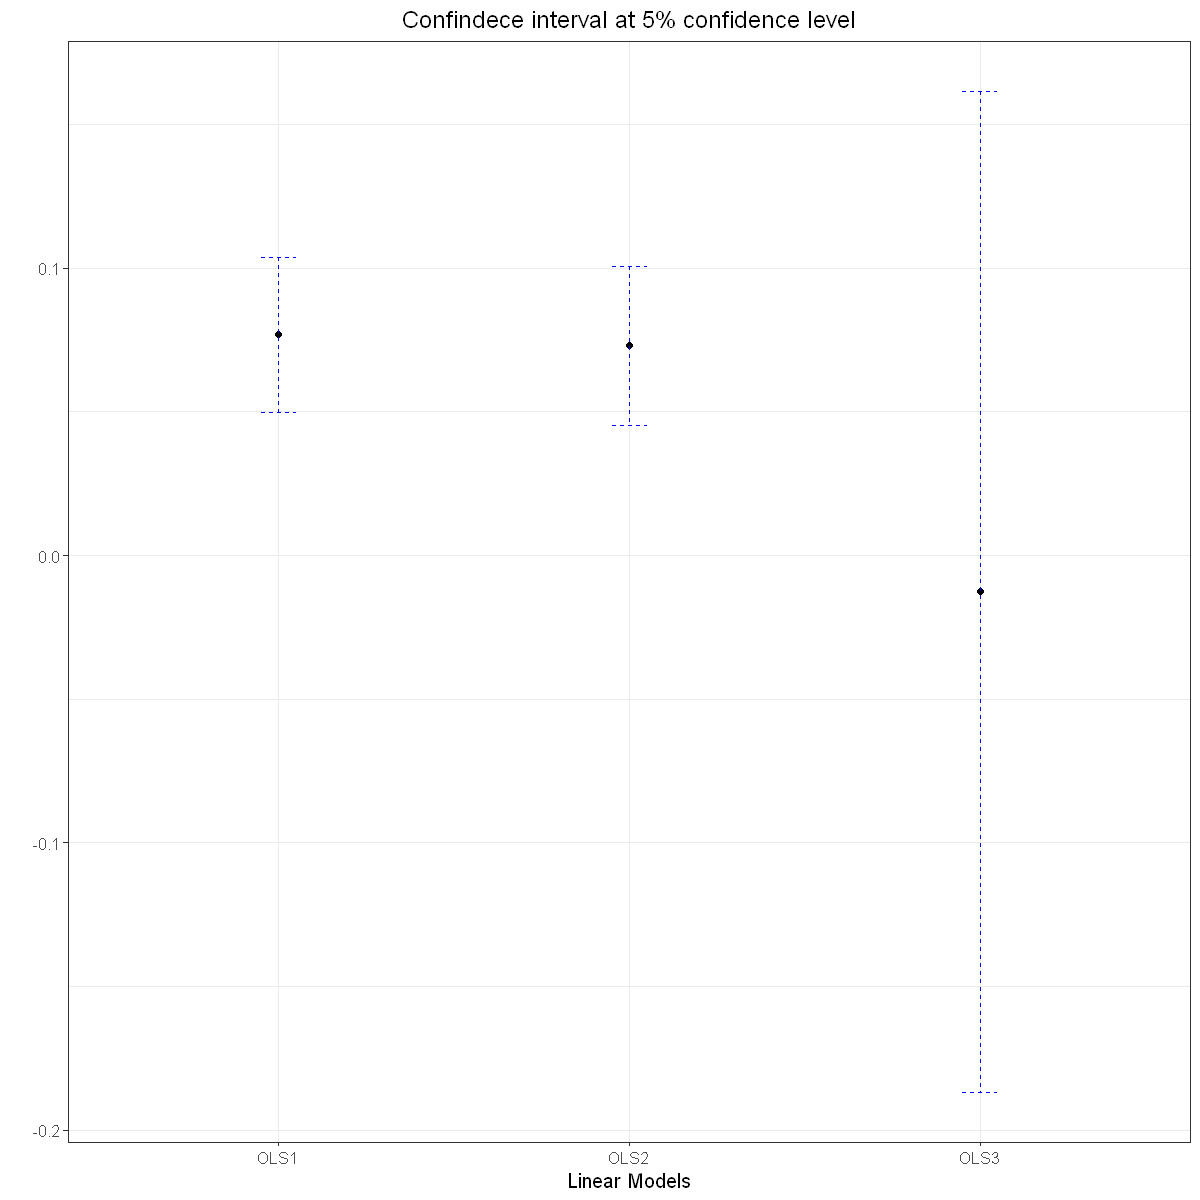

In [64]:
options(repr.plot.width = 10, repr.plot.height =10)  # plot size 

ggplot(tab1, aes(x=rownames(tab1), y=Estimate)) + geom_point(size=1.5) + geom_errorbar(aes(ymin=lower_bound, ymax=upper_bound) , width = 0.1,color="blue", linetype="dashed") + 
labs(x="Linear Models", y="") + ggtitle("Confindece interval at 5% confidence level") +
theme_bw()  + theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5))

2. Use la base de datos mental_health_center para crear las columnas del tipo de institución del centro de salud y del RUC. Nótese que esta información está contenida en la columna Institución_ruc.

In [137]:
Datos = read_excel("C:/Users/USER/Documents/GitHub/1ECO35_R_PYTHON/data/Centro_salud/Centro_salud_mental.xls")
Datos   
#seleccionamos el directorio de la base de datos centro de salud mental

Departamento,Provincia,Distrito,UBIGEO,Dirección,Institución_ruc
CALLAO,CALLAO,LA PERLA,070104,AVENIDA LA PAZ CUADRA 3 LA PERLA CALLAO CALLAO,GOBIERNO REGIONAL 20147907487
LIMA,LIMA,RIMAC,150128,Calle Los Virreyes 205. Urbanización El Manzano Rimac. Costado de la Veterinaria Municipal,MINSA 20602217508
AREQUIPA,AREQUIPA,JOSE LUIS BUSTAMANTE Y RIVERO,040129,AVENIDA CARACAS NÚMERO 807 URBANIZACIÓN SIMÓN BOLÍVAR DISTRITO JOSE LUIS BUSTAMANTE Y RIVERO PROVINCIA AREQUIPA DEPARTAMENTO AREQUIPA,GOBIERNO REGIONAL 20172661794
LIMA,LIMA,COMAS,150110,Los Rosales Mz G8 Lt 02 altura de la 33 de la Av. Los,MINSA 20602217508
LA LIBERTAD,TRUJILLO,EL PORVENIR,130102,Mz Z1 Antenor Orrego - Rio Seco. Ref. Casa Blanca--- EL PORVENIR TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL 20218911189
LA LIBERTAD,TRUJILLO,FLORENCIA DE MORA,130103,CALLE 20 DE JUNIO CUADRA 09 BARRIO 06 S/N FLORENCIA DE MORA TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL 20218911189
LA LIBERTAD,TRUJILLO,EL PORVENIR,130102,OTROS MANUEL UBALDE NÚMERO 679 DISTRITO EL PORVENIR PROVINCIA TRUJILLO DEPARTAMENTO LA LIBERTAD,GOBIERNO REGIONAL 20218911189
LA LIBERTAD,TRUJILLO,TRUJILLO,130101,AVENIDA CESAR VALLEJO/ MZ 45 AA. HH. HUERTA BELLA S/N TRUJILLO TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL 20218911189
APURIMAC,ANDAHUAYLAS,TALAVERA,030216,AVENIDA 28 DE JULIO 296 1 AL COSTADO DEL MERCADO DE TALAVERA TALAVERA ANDAHUAYLAS APURIMAC,GOBIERNO REGIONAL 20199917928
LORETO,LORETO,NAUTA,160301,CALLE MARAÑON NÚMERO S/N DISTRITO NAUTA PROVINCIA LORETO DEPARTAMENTO LORETO,GOBIERNO REGIONAL


In [146]:
filter_list <- c()

for (i in 1:length(Datos$Institución_ruc)){
        w <-  gsub("[0-9]",'', Datos$Institución_ruc[i])
        filter_list[i] <- w
        print(w)    
}
#hacemos un filtrado de esta base de datos

[1] "GOBIERNO REGIONAL "
[1] "MINSA "
[1] "GOBIERNO REGIONAL "
[1] "MINSA "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL"
[1] "MINSA "
[1] "MINSA "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "MINSA "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "MINSA "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL"
[1] "MINSA "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIERNO REGIONAL "
[1] "GOBIER

In [147]:
filter_list

[1] "GOBIERNO REGIONAL " "MINSA "             "GOBIERNO REGIONAL "
 [4] "MINSA "             "GOBIERNO REGIONAL " "GOBIERNO REGIONAL "
 [7] "GOBIERNO REGIONAL " "GOBIERNO REGIONAL " "GOBIERNO REGIONAL "
[10] "GOBIERNO REGIONAL"  "MINSA "             "MINSA "            
[13] "GOBIERNO REGIONAL " "GOBIERNO REGIONAL " "GOBIERNO REGIONAL "
[16] "GOBIERNO REGIONAL " "GOBIERNO REGIONAL " "MINSA "            
[19] "GOBIERNO REGIONAL " "GOBIERNO REGIONAL " "GOBIERNO REGIONAL "
[22] "GOBIERNO REGIONAL " "GOBIERNO REGIONAL " "GOBIERNO REGIONAL "
[25] "GOBIERNO REGIONAL " "GOBIERNO REGIONAL " "GOBIERNO REGIONAL "
[28] "GOBIERNO REGIONAL " "MINSA "             "GOBIERNO REGIONAL "
[31] "GOBIERNO REGIONAL " "GOBIERNO REGIONAL " "GOBIERNO REGIONAL "
[34] "GOBIERNO REGIONAL " "GOBIERNO REGIONAL"  "MINSA "            
[37] "GOBIERNO REGIONAL " "GOBIERNO REGIONAL " "GOBIERNO REGIONAL "
[40] "GOBIERNO REGIONAL " "GOBIERNO REGIONAL " "GOBIERNO REGIONAL "
[43] "GOBIERNO REGIONAL " "GOBIERNO REGIONAL " "GOBIERNO REGIONAL "
[46] "MINSA "             "GOBIERNO REGIONAL " "GOBIERNO REGIONAL "
[49] "GOBIERNO REGIONAL " "GOBIERNO REGIONAL " "GOBIERNO REGIONAL "
[52] "GOBIERNO REGIONAL " "MINSA "             "GOBIERNO REGIONAL "
[55] "GOBIERNO REGIONAL " "GOBIERNO REGIONAL "

In [148]:
Datos['Institución']=filter_list
Datos
#tomamos el direcotorio de institucion 

Departamento,Provincia,Distrito,UBIGEO,Dirección,Institución_ruc,Institución
CALLAO,CALLAO,LA PERLA,070104,AVENIDA LA PAZ CUADRA 3 LA PERLA CALLAO CALLAO,GOBIERNO REGIONAL 20147907487,GOBIERNO REGIONAL
LIMA,LIMA,RIMAC,150128,Calle Los Virreyes 205. Urbanización El Manzano Rimac. Costado de la Veterinaria Municipal,MINSA 20602217508,MINSA
AREQUIPA,AREQUIPA,JOSE LUIS BUSTAMANTE Y RIVERO,040129,AVENIDA CARACAS NÚMERO 807 URBANIZACIÓN SIMÓN BOLÍVAR DISTRITO JOSE LUIS BUSTAMANTE Y RIVERO PROVINCIA AREQUIPA DEPARTAMENTO AREQUIPA,GOBIERNO REGIONAL 20172661794,GOBIERNO REGIONAL
LIMA,LIMA,COMAS,150110,Los Rosales Mz G8 Lt 02 altura de la 33 de la Av. Los,MINSA 20602217508,MINSA
LA LIBERTAD,TRUJILLO,EL PORVENIR,130102,Mz Z1 Antenor Orrego - Rio Seco. Ref. Casa Blanca--- EL PORVENIR TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL 20218911189,GOBIERNO REGIONAL
LA LIBERTAD,TRUJILLO,FLORENCIA DE MORA,130103,CALLE 20 DE JUNIO CUADRA 09 BARRIO 06 S/N FLORENCIA DE MORA TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL 20218911189,GOBIERNO REGIONAL
LA LIBERTAD,TRUJILLO,EL PORVENIR,130102,OTROS MANUEL UBALDE NÚMERO 679 DISTRITO EL PORVENIR PROVINCIA TRUJILLO DEPARTAMENTO LA LIBERTAD,GOBIERNO REGIONAL 20218911189,GOBIERNO REGIONAL
LA LIBERTAD,TRUJILLO,TRUJILLO,130101,AVENIDA CESAR VALLEJO/ MZ 45 AA. HH. HUERTA BELLA S/N TRUJILLO TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL 20218911189,GOBIERNO REGIONAL
APURIMAC,ANDAHUAYLAS,TALAVERA,030216,AVENIDA 28 DE JULIO 296 1 AL COSTADO DEL MERCADO DE TALAVERA TALAVERA ANDAHUAYLAS APURIMAC,GOBIERNO REGIONAL 20199917928,GOBIERNO REGIONAL
LORETO,LORETO,NAUTA,160301,CALLE MARAÑON NÚMERO S/N DISTRITO NAUTA PROVINCIA LORETO DEPARTAMENTO LORETO,GOBIERNO REGIONAL,GOBIERNO REGIONAL


In [152]:
#ahora tomamos los datos de los ruc 
filter_list <- c()

for (i in 1:length(Datos$Institución_ruc)){
        w <-  gsub("[^0-9]",'', Datos$Institución_ruc[i])
        filter_list[i] <- w
        print(w)    
}

[1] "20147907487"
[1] "20602217508"
[1] "20172661794"
[1] "20602217508"
[1] "20218911189"
[1] "20218911189"
[1] "20218911189"
[1] "20218911189"
[1] "20199917928"
[1] ""
[1] "20602251641"
[1] "20602250602"
[1] "20172661794"
[1] "20490215850"
[1] "20450736539"
[1] "20145686548"
[1] "20222308080"
[1] "20602217508"
[1] "20199565398"
[1] "20170258054"
[1] "20171001065"
[1] "20165645325"
[1] "20489252601"
[1] "20602799973"
[1] "20172661794"
[1] "20603980248"
[1] "20191045671"
[1] "20490215850"
[1] "20602250602"
[1] "20170258054"
[1] "20450241564"
[1] "20171178585"
[1] "20163833094"
[1] "20156003817"
[1] ""
[1] "20602251641"
[1] "20491240742"
[1] "20531320574"
[1] "20167237895"
[1] "20145686548"
[1] "20145686548"
[1] "20145686548"
[1] "20156176240"
[1] "20452308992"
[1] "20486391279"
[1] "20602250602"
[1] "20172661794"
[1] "20171001065"
[1] "20411038506"
[1] "20171178585"
[1] "20162197461"
[1] "20600985206"
[1] "20602236596"
[1] "20534791381"
[1] "20528442154"
[1] "20363839500"


In [153]:
filter_list   #obtenemos el ruc de cada institucion 

[1] "20147907487" "20602217508" "20172661794" "20602217508" "20218911189"
 [6] "20218911189" "20218911189" "20218911189" "20199917928" ""           
[11] "20602251641" "20602250602" "20172661794" "20490215850" "20450736539"
[16] "20145686548" "20222308080" "20602217508" "20199565398" "20170258054"
[21] "20171001065" "20165645325" "20489252601" "20602799973" "20172661794"
[26] "20603980248" "20191045671" "20490215850" "20602250602" "20170258054"
[31] "20450241564" "20171178585" "20163833094" "20156003817" ""           
[36] "20602251641" "20491240742" "20531320574" "20167237895" "20145686548"
[41] "20145686548" "20145686548" "20156176240" "20452308992" "20486391279"
[46] "20602250602" "20172661794" "20171001065" "20411038506" "20171178585"
[51] "20162197461" "20600985206" "20602236596" "20534791381" "20528442154"
[56] "20363839500"

In [154]:
Datos['RUC']=filter_list
Datos

Departamento,Provincia,Distrito,UBIGEO,Dirección,Institución_ruc,Institución,RUC
CALLAO,CALLAO,LA PERLA,070104,AVENIDA LA PAZ CUADRA 3 LA PERLA CALLAO CALLAO,GOBIERNO REGIONAL 20147907487,GOBIERNO REGIONAL,20147907487
LIMA,LIMA,RIMAC,150128,Calle Los Virreyes 205. Urbanización El Manzano Rimac. Costado de la Veterinaria Municipal,MINSA 20602217508,MINSA,20602217508
AREQUIPA,AREQUIPA,JOSE LUIS BUSTAMANTE Y RIVERO,040129,AVENIDA CARACAS NÚMERO 807 URBANIZACIÓN SIMÓN BOLÍVAR DISTRITO JOSE LUIS BUSTAMANTE Y RIVERO PROVINCIA AREQUIPA DEPARTAMENTO AREQUIPA,GOBIERNO REGIONAL 20172661794,GOBIERNO REGIONAL,20172661794
LIMA,LIMA,COMAS,150110,Los Rosales Mz G8 Lt 02 altura de la 33 de la Av. Los,MINSA 20602217508,MINSA,20602217508
LA LIBERTAD,TRUJILLO,EL PORVENIR,130102,Mz Z1 Antenor Orrego - Rio Seco. Ref. Casa Blanca--- EL PORVENIR TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL 20218911189,GOBIERNO REGIONAL,20218911189
LA LIBERTAD,TRUJILLO,FLORENCIA DE MORA,130103,CALLE 20 DE JUNIO CUADRA 09 BARRIO 06 S/N FLORENCIA DE MORA TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL 20218911189,GOBIERNO REGIONAL,20218911189
LA LIBERTAD,TRUJILLO,EL PORVENIR,130102,OTROS MANUEL UBALDE NÚMERO 679 DISTRITO EL PORVENIR PROVINCIA TRUJILLO DEPARTAMENTO LA LIBERTAD,GOBIERNO REGIONAL 20218911189,GOBIERNO REGIONAL,20218911189
LA LIBERTAD,TRUJILLO,TRUJILLO,130101,AVENIDA CESAR VALLEJO/ MZ 45 AA. HH. HUERTA BELLA S/N TRUJILLO TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL 20218911189,GOBIERNO REGIONAL,20218911189
APURIMAC,ANDAHUAYLAS,TALAVERA,030216,AVENIDA 28 DE JULIO 296 1 AL COSTADO DEL MERCADO DE TALAVERA TALAVERA ANDAHUAYLAS APURIMAC,GOBIERNO REGIONAL 20199917928,GOBIERNO REGIONAL,20199917928
LORETO,LORETO,NAUTA,160301,CALLE MARAÑON NÚMERO S/N DISTRITO NAUTA PROVINCIA LORETO DEPARTAMENTO LORETO,GOBIERNO REGIONAL,GOBIERNO REGIONAL,


In [157]:
drop <- c("Institución_ruc")    #dropeamos a institucion_ruc y nos quedariamos con nuestra base de datos limpia 

Datos <- Datos[,! names(Datos) %in% drop]

In [158]:
Datos

Departamento,Provincia,Distrito,UBIGEO,Dirección,Institución,RUC
CALLAO,CALLAO,LA PERLA,070104,AVENIDA LA PAZ CUADRA 3 LA PERLA CALLAO CALLAO,GOBIERNO REGIONAL,20147907487
LIMA,LIMA,RIMAC,150128,Calle Los Virreyes 205. Urbanización El Manzano Rimac. Costado de la Veterinaria Municipal,MINSA,20602217508
AREQUIPA,AREQUIPA,JOSE LUIS BUSTAMANTE Y RIVERO,040129,AVENIDA CARACAS NÚMERO 807 URBANIZACIÓN SIMÓN BOLÍVAR DISTRITO JOSE LUIS BUSTAMANTE Y RIVERO PROVINCIA AREQUIPA DEPARTAMENTO AREQUIPA,GOBIERNO REGIONAL,20172661794
LIMA,LIMA,COMAS,150110,Los Rosales Mz G8 Lt 02 altura de la 33 de la Av. Los,MINSA,20602217508
LA LIBERTAD,TRUJILLO,EL PORVENIR,130102,Mz Z1 Antenor Orrego - Rio Seco. Ref. Casa Blanca--- EL PORVENIR TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL,20218911189
LA LIBERTAD,TRUJILLO,FLORENCIA DE MORA,130103,CALLE 20 DE JUNIO CUADRA 09 BARRIO 06 S/N FLORENCIA DE MORA TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL,20218911189
LA LIBERTAD,TRUJILLO,EL PORVENIR,130102,OTROS MANUEL UBALDE NÚMERO 679 DISTRITO EL PORVENIR PROVINCIA TRUJILLO DEPARTAMENTO LA LIBERTAD,GOBIERNO REGIONAL,20218911189
LA LIBERTAD,TRUJILLO,TRUJILLO,130101,AVENIDA CESAR VALLEJO/ MZ 45 AA. HH. HUERTA BELLA S/N TRUJILLO TRUJILLO LA LIBERTAD,GOBIERNO REGIONAL,20218911189
APURIMAC,ANDAHUAYLAS,TALAVERA,030216,AVENIDA 28 DE JULIO 296 1 AL COSTADO DEL MERCADO DE TALAVERA TALAVERA ANDAHUAYLAS APURIMAC,GOBIERNO REGIONAL,20199917928
LORETO,LORETO,NAUTA,160301,CALLE MARAÑON NÚMERO S/N DISTRITO NAUTA PROVINCIA LORETO DEPARTAMENTO LORETO,GOBIERNO REGIONAL,
